In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ela_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2019.csv')
ela_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2022.csv')

sci_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2019.csv')
sci_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2022.csv')

math_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_math_2019.csv')
math_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_math_2022.csv')

# take 3.2s to run

/tmp/ipykernel_5738/1432468013.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ela_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2019.csv')
/tmp/ipykernel_5738/1432468013.py:5: DtypeWarning: Columns (11,12,13,15,19,21,22,24,28,30,31,33,37,39,40,42,46,48,49,51,55,57,58,60,64,66,67,69,73,75,76,78,82,84,85,87,91,93,94,96,100,102,103,105,109,111,112,114,118,120,121,123,127,129) have mixed types. Specify dtype option on import or set low_memory=False.
  sci_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2022.csv')
/tmp/ipykernel_5738/1432468013.py:8: DtypeWarning: Columns (11,12,13,15,19,21,22,24,28,30,31,33,37,39,40,42,46,48,49,51,55,57,58,60,64,66,67,69,73,75,76,78,82,84,85,87,91,93,94,96,100,102,103,105,109,111,112,114,118,120,121,123,127,129) have mixed types. Specify dtype option on import or set low_memory=False.
  

In [3]:
ela_pre.isnull().sum()

ENTITY_CD                                           0
ENTITY_NAME                                         0
YEAR                                                0
ASSESSMENT_NAME                                     0
NOT_TESTED                                          0
                                                 ... 
Students with Disabilities_NOT_TESTED            9636
Students with Disabilities_NUM_PROF              9636
Students with Disabilities_NUM_TESTED            9636
Students with Disabilities_PER_PROF              9636
Students with Disabilities_TOTAL_SCALE_SCORES    9636
Length: 88, dtype: int64

In [4]:
ela_pre.columns

Index(['ENTITY_CD', 'ENTITY_NAME', 'YEAR', 'ASSESSMENT_NAME', 'NOT_TESTED',
       'NUM_TESTED', 'NUM_PROF', 'PER_PROF', 'TOTAL_SCALE_SCORES',
       'MEAN_SCORE', 'Female_MEAN_SCORE', 'Female_NOT_TESTED',
       'Female_NUM_PROF', 'Female_NUM_TESTED', 'Female_PER_PROF',
       'Female_TOTAL_SCALE_SCORES', 'Male_MEAN_SCORE', 'Male_NOT_TESTED',
       'Male_NUM_PROF', 'Male_NUM_TESTED', 'Male_PER_PROF',
       'Male_TOTAL_SCALE_SCORES',
       'American Indian or Alaska Native_MEAN_SCORE',
       'American Indian or Alaska Native_NOT_TESTED',
       'American Indian or Alaska Native_NUM_PROF',
       'American Indian or Alaska Native_NUM_TESTED',
       'American Indian or Alaska Native_PER_PROF',
       'American Indian or Alaska Native_TOTAL_SCALE_SCORES',
       'Asian or Native Hawaiian/Other Pacific Islander_MEAN_SCORE',
       'Asian or Native Hawaiian/Other Pacific Islander_NOT_TESTED',
       'Asian or Native Hawaiian/Other Pacific Islander_NUM_PROF',
       'Asian or Native Haw

In [5]:
lst_col = [
    "ENTITY_CD",
    "Female_MEAN_SCORE",
    "Male_MEAN_SCORE",
    "MEAN_SCORE",
    "YEAR"
]

ela_pre = ela_pre[lst_col]
ela_post = ela_post[lst_col]

sci_pre = sci_pre[lst_col]
sci_post = sci_post[lst_col]

math_pre = math_pre[lst_col]
math_post = math_post[lst_col]


In [6]:
ela_pre['Type'] = 'ela_pre'
ela_post['Type'] = 'ela_post'

sci_pre['Type'] = 'sci_pre'
sci_post['Type'] = 'sci_post'

math_pre['Type'] = 'math_pre'
math_post['Type'] = 'math_post'


In [7]:
ela_pre

ENTITY_CD Female_MEAN_SCORE Male_MEAN_SCORE MEAN_SCORE  YEAR   
0                 1               604             598        601  2018  \
1                 1               NaN             NaN         00  2018   
2                 1               603             598        600  2018   
3                 1               605             598        602  2018   
4                 1               605             598        602  2018   
...             ...               ...             ...        ...   ...   
41550  680801040002               593             594        594  2019   
41551  680801040002               598             599        599  2019   
41552  680801040002               598             595        596  2019   
41553  680801040002               597             586        591  2019   
41554  680801040002               NaN             NaN          0  2019   

          Type  
0      ela_pre  
1      ela_pre  
2      ela_pre  
3      ela_pre  
4      ela_pre  
...        ...  
41550  ela_pre  
41551  ela_pre  
41552  ela_pre  
41553  ela_pre  
41554  ela_pre  

[41555 rows x 6 columns]

In [8]:
# combine all the dataframes into one

df = pd.concat([ela_pre, ela_post, sci_pre, sci_post, math_pre, math_post], ignore_index=True)
df

ENTITY_CD Female_MEAN_SCORE Male_MEAN_SCORE MEAN_SCORE  YEAR   
0                  1               604             598        601  2018  \
1                  1               NaN             NaN         00  2018   
2                  1               603             598        600  2018   
3                  1               605             598        602  2018   
4                  1               605             598        602  2018   
...              ...               ...             ...        ...   ...   
248240  680801040002               NaN             NaN        NaN  2022   
248241  680801040002               590             582        585  2022   
248242  680801040002               NaN             NaN        NaN  2022   
248243  680801040002               589             601        595  2022   
248244  680801040002               591             593        592  2022   

             Type  
0         ela_pre  
1         ela_pre  
2         ela_pre  
3         ela_pre  
4         ela_pre  
...           ...  
248240  math_post  
248241  math_post  
248242  math_post  
248243  math_post  
248244  math_post  

[248245 rows x 6 columns]

In [9]:

df.groupby('Type')['ENTITY_CD'].nunique()

Type
ela_post     4601
ela_pre      4417
math_post    4604
math_pre     4419
sci_post     4476
sci_pre      4295
Name: ENTITY_CD, dtype: int64

<Axes: xlabel='Type'>

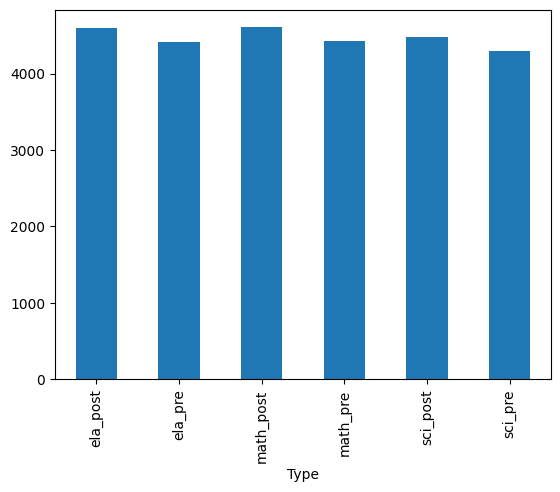

In [10]:

df.groupby('Type')['ENTITY_CD'].nunique().plot(kind='bar')


In [11]:
df.groupby('ENTITY_CD')['Type'].nunique().sort_values(ascending=False)

ENTITY_CD
1               6
353100860984    6
400400010001    6
400400010000    6
400301060005    6
               ..
580209020002    1
81200050002     1
662401060010    1
660101030004    1
261600010097    1
Name: Type, Length: 4710, dtype: int64

In [13]:
len(df.groupby('ENTITY_CD')['Type'].nunique() == 6)

4710

In [14]:
# store a list of ENTITY_CD that have all 6 types of data

lst = df.groupby('ENTITY_CD')['Type'].nunique()[df.groupby('ENTITY_CD')['Type'].nunique() == 6].index.tolist()
len(lst)

4187

In [17]:
df = df[df['ENTITY_CD'].isin(lst)]
df

ENTITY_CD Female_MEAN_SCORE Male_MEAN_SCORE MEAN_SCORE  YEAR   
0                  1               604             598        601  2018  \
1                  1               NaN             NaN         00  2018   
2                  1               603             598        600  2018   
3                  1               605             598        602  2018   
4                  1               605             598        602  2018   
...              ...               ...             ...        ...   ...   
248240  680801040002               NaN             NaN        NaN  2022   
248241  680801040002               590             582        585  2022   
248242  680801040002               NaN             NaN        NaN  2022   
248243  680801040002               589             601        595  2022   
248244  680801040002               591             593        592  2022   

             Type  
0         ela_pre  
1         ela_pre  
2         ela_pre  
3         ela_pre  
4         ela_pre  
...           ...  
248240  math_post  
248241  math_post  
248242  math_post  
248243  math_post  
248244  math_post  

[240002 rows x 6 columns]

In [20]:
df.isnull().sum()

ENTITY_CD                0
Female_MEAN_SCORE    94090
Male_MEAN_SCORE      93746
MEAN_SCORE           57322
YEAR                     0
Type                     0
dtype: int64